In [41]:
import ee, datetime
import pandas as pd
import matplotlib.dates as mdates
from IPython.display import Image
from matplotlib import dates
from pylab import *
from numpy import fft
from statsmodels.tsa.stattools import adfuller
from pandas.tseries.offsets import MonthEnd
from statsmodels.tsa.arima_model import ARIMA
from fbprophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
ee.Initialize()

In [42]:
data = pd.read_csv("megacities.csv") 

collection = ee.ImageCollection('COPERNICUS/S5P/NRTI/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2018-01-01', '2020-06-30')
point = {'type':'Point', 'coordinates':[-99.545934,20.572173]};
info = collection.getRegion(point,25000).getInfo()
# Reshape image collection 
header = info[0]
data = array(info[1:])

iTime = header.index('time')
time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
band_list = ['tropospheric_NO2_column_number_density']

iBands = [header.index(b) for b in band_list]
yData = data[0:,iBands].astype(np.float)


In [43]:
df = pd.DataFrame(data=yData, index=list(range(len(yData))), columns=['NO2'])
df = df.interpolate()
df['Date'] = pd.Series(time, index=df.index)

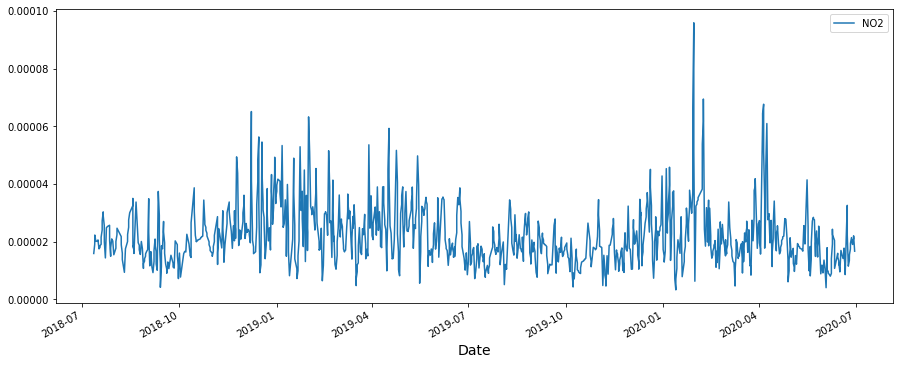

In [44]:
rcParams['figure.figsize'] = 15, 6
df.plot(y='NO2',x='Date')
plt.show()

In [45]:
mask19 = (df['Date'] > '2019-03-23') & (df['Date'] <= '2019-5-31')
print(df.loc[mask19].mean().values[0])
mask20 = (df['Date'] > '2020-03-23') & (df['Date'] <= '2020-5-31')
print(df.loc[mask20].mean().values[0])

2.635680170468416e-05
2.3151603727532863e-05


In [46]:
data_ = pd.read_csv("megacities.csv") 

In [47]:
data_['Latitude'].iloc[0]

12.9716

In [50]:
diff_= []
std_ = []
for i_megc in range(data_.shape[0]):
    if data_['Start_date'].iloc[i_megc]=='xxx':
        diff_.append('nan')
        continue
    collection = ee.ImageCollection('COPERNICUS/S5P/NRTI/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2018-01-01', '2020-06-30')
    point = {'type':'Point', 'coordinates':[data_['Longitude'].iloc[i_megc],data_['Latitude'].iloc[i_megc]]};
    info = collection.getRegion(point,np.sqrt(data_['Area'].iloc[i_megc])*1000).getInfo()
# Reshape image collection 
    header = info[0]
    data = array(info[1:])

    iTime = header.index('time')
    time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
    band_list = ['tropospheric_NO2_column_number_density']

    iBands = [header.index(b) for b in band_list]
    yData = data[0:,iBands].astype(np.float)

    df = pd.DataFrame(data=yData, index=list(range(len(yData))), columns=['NO2'])
    df = df.interpolate()
    df['Date'] = pd.Series(time, index=df.index)
    mask19 = (df['Date'] > '2019'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2019'+data_['End_date'].iloc[0][4:])
    mask19_ = (df.loc[mask19].mean().values[0])
    mask20 = (df['Date'] > '2020'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2020'+data_['End_date'].iloc[0][4:])
    mask20_ = (df.loc[mask20].mean().values[0])
    p_change = ((mask19_ - mask20_)/(mask19_))*100
    p_std = (df.loc[mask19].std().values[0]/mask19_)*100
    diff_.append(p_change)
    std_.append(p_std)
    print(data_['Name'].iloc[i_megc])

Bangalore
Bangkok
Beijing
Bogota
Buenos Aires
Cairo
Chengdu
Chennai
Chongqing
Delhi
Dhaka
Guangzhou
Ho Chi Minh City
Hyderabad
Istanbul
Jakarta
Johannesburg
Karachi
Kinshasa
Kolkata
Lagos
Lahore
Lima
London
Los Angeles
Manila
Mexico City
Moscow
Mumbai
New York City
Paris
Rio de Janeiro
São Paulo
Shanghai
Shenzhen
Tehran
Tianjin
Xiamen
Vienna
Brussels
Sofia
Zagreb
Nicosia
Prague
Copenhagen
Tallinn
Helsinki
Berlin
Athens
Budapest
Dublin
Rome
Riga
Vilnius
Luxembourg
Valletta
Amsterdam
Warsaw
Lisbon
Bucharest
Bratislava
Ljubljana
Madrid
Doha
Macau
Singapore
Bandar Seri Begawan
Abu Dhabi
Kuwait City
Hong Kong
Taipei
Riyadh
Canberra
Ottawa
Manama
Muscat
Wellington
San Juan
Jerusalem
Kuala Lumpur
Port of Spain
Nassau
Victoria (Seychelles)
Saint Kitts and Nevis
Antigua and Barbuda
Panama City
Santiago
Port Louis


In [57]:
len(diff_)

93

In [11]:
diff_= []
for i_megc in range(data_.shape[0]):
    if data_['Start_date'].iloc[i_megc]=='xxx':
        diff_.append('nan')
        continue
    collection = ee.ImageCollection('COPERNICUS/S5P/NRTI/L3_SO2').select('SO2_column_number_density').filterDate('2018-01-01', '2020-06-30')
   
    point = {'type':'Point', 'coordinates':[data_['Longitude'].iloc[i_megc],data_['Latitude'].iloc[i_megc]]};
    info = collection.getRegion(point,np.sqrt(data_['Area'].iloc[i_megc])*1000).getInfo()
# Reshape image collection 
    header = info[0]
    data = array(info[1:])

    iTime = header.index('time')
    time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
    band_list = ['SO2_column_number_density']

    iBands = [header.index(b) for b in band_list]
    yData = data[0:,iBands].astype(np.float)

    df = pd.DataFrame(data=yData, index=list(range(len(yData))), columns=['NO2'])
    df = df.interpolate()
    df['Date'] = pd.Series(time, index=df.index)
    mask19 = (df['Date'] > '2019'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2019'+data_['End_date'].iloc[0][4:])
    mask19_ = (df.loc[mask19].mean().values[0])
    mask20 = (df['Date'] > '2020'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2020'+data_['End_date'].iloc[0][4:])
    mask20_ = (df.loc[mask20].mean().values[0])
    p_change = ((mask19_ - mask20_)/(mask19_))*100
    diff_.append(p_change)
    print(data_['Name'].iloc[i_megc])

Bangalore


KeyboardInterrupt: 

In [15]:
diff_

[67.77397531629826,
 190.03429094774575,
 -8.1660220196351,
 293.06251878697276,
 -21.419048905425782,
 -85.0874801976478,
 628.5112113258484,
 53.868169907377194,
 47.41309652216051,
 -22.499149973218,
 42.345617205940584,
 -55.33134416271094,
 -159.39974151767908,
 77.94622985481243,
 1.7992321890433312,
 -32.44281206340086,
 -6.766445655856611,
 33.64144079426446,
 31209.174400293443,
 22.73358438738863,
 73.40342488300881,
 -9.745071838469142,
 97.82604495716849,
 -5.641487918802013,
 6.4158452845930745,
 31.904518599425547,
 -150.72809798013026,
 -59.80944301207204,
 -1.5972026587798087,
 'nan',
 -24.828662191789103,
 'nan',
 -134.4001951882305,
 -142.64923905488283,
 -78.72322130613097,
 'nan',
 -1.0057009606784288,
 134.52344875943493,
 86.30463310371674,
 -84.23991001511257,
 'nan',
 1967.227601743178,
 -123.83027666568655,
 -26.74215328653393,
 -35.568780114828726,
 -68.99782058390409,
 -113.5408881926161,
 -60.10395132636563,
 -74.77974004206386,
 -5.790878459985568,
 -1.7312

In [16]:
diff_= []
for i_megc in range(data_.shape[0]):
    if data_['Start_date'].iloc[i_megc]=='xxx':
        diff_.append('nan')
        continue
    collection = ee.ImageCollection('MODIS/006/MOD13Q1').select('NDVI').filterDate('2018-01-01', '2020-06-30')
    point = {'type':'Point', 'coordinates':[data_['Longitude'].iloc[i_megc],data_['Latitude'].iloc[i_megc]]};
    info = collection.getRegion(point,np.sqrt(data_['Area'].iloc[i_megc])*1000).getInfo()
# Reshape image collection 
    header = info[0]
    data = array(info[1:])

    iTime = header.index('time')
    time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
    band_list = ['NDVI']

    iBands = [header.index(b) for b in band_list]
    yData = data[0:,iBands].astype(np.float)

    df = pd.DataFrame(data=yData, index=list(range(len(yData))), columns=['NO2'])
    df = df.interpolate()
    df['Date'] = pd.Series(time, index=df.index)
    mask19 = (df['Date'] > '2019'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2019'+data_['End_date'].iloc[0][4:])
    mask19_ = (df.loc[mask19].mean().values[0])
    mask20 = (df['Date'] > '2020'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2020'+data_['End_date'].iloc[0][4:])
    mask20_ = (df.loc[mask20].mean().values[0])
    p_change = ((mask19_ - mask20_)/(mask19_))*100
    diff_.append(p_change)
    print(data_['Name'].iloc[i_megc])

Bangalore
Bangkok
Beijing
Bogota
Buenos Aires
Cairo
Chengdu
Chennai
Chongqing
Delhi
Dhaka
Guangzhou
Ho Chi Minh City
Hyderabad
Istanbul
Jakarta
Johannesburg
Karachi
Kinshasa
Kolkata
Lagos
Lahore
Lima
London
Los Angeles
Metro Manila
Mexico City
Moscow
Mumbai
New York City
Paris
Rio de Janeiro
São Paulo
Shanghai
Shenzhen
Tehran
Tianjin
Xiamen
Vienna
Brussels
Sofia
Zagreb
Nicosia
Prague
Copenhagen
Tallinn
Helsinki
Berlin
Athens
Budapest
Dublin
Rome
Riga
Vilnius
Luxembourg
Valletta
Amsterdam
Warsaw
Lisbon
Bucharest
Bratislava
Ljubljana
Madrid
Doha
Macau
Singapore
Bandar Seri Begawan
Abu Dhabi
Kuwait City
Hong Kong
Taipei
Riyadh
Canberra
Ottawa
Manama
Muscat
Wellington
San Juan
Jerusalem
Kuala Lumpur
Port of Spain
Nassau
Victoria
Saint Kitts and Nevis
Antigua and Barbuda
Panama City
Santiago
Port Louis


In [17]:
diff_

[-3.837145219068614,
 7.840392019600979,
 1.5914574670157606,
 7.364951293909279,
 -4.426961014560827,
 -3.1322156409999,
 5.957730812013348,
 -25.373913043478264,
 -0.8844889844605834,
 -4.355809446087932,
 -3.474752732951588,
 -28.19346453769031,
 -0.4673686581451658,
 -10.124963101446422,
 0.5789252532797983,
 -2.526528549772612,
 -3.636804461146806,
 -30.76250819313961,
 -1.4117336617116722,
 -1.0679797915201126,
 -9.5312616439377,
 -10.390346614836412,
 -2.8823058446757406,
 -9.920965058236272,
 -3.540581929555896,
 -3.833620854897451,
 -9.929594561786843,
 9.500111086425239,
 -18.058237429520354,
 'nan',
 -2.2562109176947778,
 'nan',
 -14.323761964211402,
 0.8397108843537415,
 -0.44458138920679635,
 'nan',
 -1.3401575863694524,
 -26.30693977376949,
 2.8054014445723854,
 -3.665736715759424,
 'nan',
 4.257971394830075,
 -1.6549117226755177,
 -7.762508052394246,
 3.8240538934020214,
 0.4845244559542208,
 3.332500208281263,
 1.185459597128965,
 1.6659001481935714,
 0.7805603308089021

In [18]:
diff_= []
for i_megc in range(data_.shape[0]):
    if data_['Start_date'].iloc[i_megc]=='xxx':
        diff_.append('nan')
        continue
    collection = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_HCHO').select('tropospheric_HCHO_column_number_density').filterDate('2018-01-01', '2020-06-30')
    point = {'type':'Point', 'coordinates':[data_['Longitude'].iloc[i_megc],data_['Latitude'].iloc[i_megc]]};
    info = collection.getRegion(point,np.sqrt(data_['Area'].iloc[i_megc])*1000).getInfo()
# Reshape image collection 
    header = info[0]
    data = array(info[1:])

    iTime = header.index('time')
    time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
    band_list = ['tropospheric_HCHO_column_number_density']

    iBands = [header.index(b) for b in band_list]
    yData = data[0:,iBands].astype(np.float)

    df = pd.DataFrame(data=yData, index=list(range(len(yData))), columns=['NO2'])
    df = df.interpolate()
    df['Date'] = pd.Series(time, index=df.index)
    mask19 = (df['Date'] > '2019'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2019'+data_['End_date'].iloc[0][4:])
    mask19_ = (df.loc[mask19].mean().values[0])
    mask20 = (df['Date'] > '2020'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2020'+data_['End_date'].iloc[0][4:])
    mask20_ = (df.loc[mask20].mean().values[0])
    p_change = ((mask19_ - mask20_)/(mask19_))*100
    diff_.append(p_change)
    print(data_['Name'].iloc[i_megc])

Bangalore
Bangkok
Beijing
Bogota
Buenos Aires
Cairo
Chengdu
Chennai
Chongqing
Delhi
Dhaka
Guangzhou
Ho Chi Minh City
Hyderabad
Istanbul
Jakarta
Johannesburg
Karachi
Kinshasa
Kolkata
Lagos
Lahore
Lima
London
Los Angeles
Metro Manila
Mexico City
Moscow
Mumbai
New York City
Paris
Rio de Janeiro
São Paulo
Shanghai
Shenzhen
Tehran
Tianjin
Xiamen
Vienna
Brussels
Sofia
Zagreb
Nicosia
Prague
Copenhagen
Tallinn
Helsinki
Berlin
Athens
Budapest
Dublin
Rome
Riga
Vilnius
Luxembourg
Valletta
Amsterdam
Warsaw
Lisbon
Bucharest
Bratislava
Ljubljana
Madrid
Doha
Macau
Singapore
Bandar Seri Begawan
Abu Dhabi
Kuwait City
Hong Kong
Taipei
Riyadh
Canberra
Ottawa
Manama
Muscat
Wellington
San Juan
Jerusalem
Kuala Lumpur
Port of Spain
Nassau
Victoria
Saint Kitts and Nevis
Antigua and Barbuda
Panama City
Santiago
Port Louis


In [19]:
diff_

[14.291416215679101,
 10.27185549436027,
 -7.4599386283609155,
 15.00074655518969,
 -28.098061621884924,
 -9.275626463771841,
 3.66459258358658,
 17.5631935843086,
 2.835722856527422,
 11.613839511279556,
 6.148200606822198,
 -4.471546804278062,
 -2.281473788602302,
 3.775617548107931,
 -6.029670294470029,
 17.137817277340776,
 13.286333273568088,
 3.755764956278186,
 6.46747825210809,
 -3.8993208923080482,
 -4.822155502358337,
 11.599002337530209,
 20.564391564964456,
 -4.085638159799912,
 -14.685066349291859,
 27.996848643740073,
 11.732367433161428,
 21.57700406942224,
 2.0824568398673535,
 'nan',
 42.15395436653447,
 'nan',
 -100.85854981068421,
 3.465918211555916,
 5.736094945385857,
 'nan',
 -0.914831431663358,
 -5.76905561031678,
 28.334626913382177,
 5.6379168968408635,
 'nan',
 9.090587083477507,
 17.100408051983607,
 -47.44537844205301,
 -32.686405085791016,
 -71.78848943668535,
 44.08874124848023,
 -30.089540948293227,
 26.44258989699757,
 14.715356337340463,
 21.62465544051

In [20]:
diff_= []
for i_megc in range(data_.shape[0]):
    if data_['Start_date'].iloc[i_megc]=='xxx':
        diff_.append('nan')
        continue
    collection = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_AER_AI').select('absorbing_aerosol_index').filterDate('2018-01-01', '2020-06-30')
    point = {'type':'Point', 'coordinates':[data_['Longitude'].iloc[i_megc],data_['Latitude'].iloc[i_megc]]};
    info = collection.getRegion(point,np.sqrt(data_['Area'].iloc[i_megc])*1000).getInfo()
# Reshape image collection 
    header = info[0]
    data = array(info[1:])

    iTime = header.index('time')
    time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
    band_list = ['absorbing_aerosol_index']

    iBands = [header.index(b) for b in band_list]
    yData = data[0:,iBands].astype(np.float)

    df = pd.DataFrame(data=yData, index=list(range(len(yData))), columns=['NO2'])
    df = df.interpolate()
    df['Date'] = pd.Series(time, index=df.index)
    mask19 = (df['Date'] > '2019'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2019'+data_['End_date'].iloc[0][4:])
    mask19_ = (df.loc[mask19].mean().values[0])
    mask20 = (df['Date'] > '2020'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2020'+data_['End_date'].iloc[0][4:])
    mask20_ = (df.loc[mask20].mean().values[0])
    p_change = ((mask19_ - mask20_)/(mask19_))*100
    diff_.append(p_change)
    print(data_['Name'].iloc[i_megc])

Bangalore
Bangkok
Beijing
Bogota
Buenos Aires
Cairo
Chengdu
Chennai
Chongqing
Delhi
Dhaka
Guangzhou
Ho Chi Minh City
Hyderabad
Istanbul
Jakarta
Johannesburg
Karachi
Kinshasa
Kolkata
Lagos
Lahore
Lima
London
Los Angeles
Metro Manila
Mexico City
Moscow
Mumbai
New York City
Paris
Rio de Janeiro
São Paulo
Shanghai
Shenzhen
Tehran
Tianjin
Xiamen
Vienna
Brussels
Sofia
Zagreb
Nicosia
Prague
Copenhagen
Tallinn
Helsinki
Berlin
Athens
Budapest
Dublin
Rome
Riga
Vilnius
Luxembourg
Valletta
Amsterdam
Warsaw
Lisbon
Bucharest
Bratislava
Ljubljana
Madrid
Doha
Macau
Singapore
Bandar Seri Begawan
Abu Dhabi
Kuwait City
Hong Kong
Taipei
Riyadh
Canberra
Ottawa
Manama
Muscat
Wellington
San Juan
Jerusalem
Kuala Lumpur
Port of Spain
Nassau
Victoria
Saint Kitts and Nevis
Antigua and Barbuda
Panama City
Santiago
Port Louis


In [21]:
diff_

[-30.781488008983853,
 -31.994020119635785,
 -51.429469393275454,
 -21.819494894611893,
 -24.444734260033645,
 -80.62018987928525,
 -27.4121157257687,
 -51.20535370368482,
 -45.06047416025399,
 -917.518112087482,
 -118.7653619187789,
 -81.19537599209175,
 -24.224742138177614,
 -74.16973851345955,
 -3.3103579067464577,
 -17.85829752706928,
 -13.009371172499943,
 182.79281808109363,
 -25.092842202084046,
 -141.22822517143123,
 -67.0968260411701,
 -133.3664326690166,
 -8.71282773523554,
 -31.188300777920208,
 -30.94023868541257,
 -12.865813300410197,
 -45.630752885603066,
 -26.59833878876246,
 -59.39401192973833,
 'nan',
 -29.313517408249908,
 'nan',
 -22.44764544907809,
 -10.103176844837156,
 -12.153103922551507,
 'nan',
 -38.942583477664485,
 -67.37684161497342,
 -35.24403059431639,
 -47.33049649047697,
 'nan',
 -51.83330101166083,
 -25.429194208657606,
 -21.906442796700635,
 0.16065383152356105,
 -37.53610599171213,
 -65.89736058097515,
 -35.50776172331796,
 -34.9672648411236,
 -28.724

In [25]:
diff_= []
for i_megc in range(data_.shape[0]):
    if data_['Start_date'].iloc[i_megc]=='xxx':
        diff_.append('nan')
        continue
    collection = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_CO').select('CO_column_number_density').filterDate('2018-01-01', '2020-06-30')
    point = {'type':'Point', 'coordinates':[data_['Longitude'].iloc[i_megc],data_['Latitude'].iloc[i_megc]]};
    info = collection.getRegion(point,np.sqrt(data_['Area'].iloc[i_megc])*1000).getInfo()
# Reshape image collection 
    header = info[0]
    data = array(info[1:])

    iTime = header.index('time')
    time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
    band_list = ['CO_column_number_density']

    iBands = [header.index(b) for b in band_list]
    yData = data[0:,iBands].astype(np.float)

    df = pd.DataFrame(data=yData, index=list(range(len(yData))), columns=['NO2'])
    df = df.interpolate()
    df['Date'] = pd.Series(time, index=df.index)
    mask19 = (df['Date'] > '2019'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2019'+data_['End_date'].iloc[0][4:])
    mask19_ = (df.loc[mask19].mean().values[0])
    mask20 = (df['Date'] > '2020'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2020'+data_['End_date'].iloc[0][4:])
    mask20_ = (df.loc[mask20].mean().values[0])
    p_change = ((mask19_ - mask20_)/(mask19_))*100
    diff_.append(p_change)
    print(data_['Name'].iloc[i_megc])

Bangalore
Bangkok
Beijing
Bogota
Buenos Aires
Cairo
Chengdu
Chennai
Chongqing
Delhi
Dhaka
Guangzhou
Ho Chi Minh City
Hyderabad
Istanbul
Jakarta
Johannesburg
Karachi
Kinshasa
Kolkata
Lagos
Lahore
Lima
London
Los Angeles
Metro Manila
Mexico City
Moscow
Mumbai
New York City
Paris
Rio de Janeiro
São Paulo
Shanghai
Shenzhen
Tehran
Tianjin
Xiamen
Vienna
Brussels
Sofia
Zagreb
Nicosia
Prague
Copenhagen
Tallinn
Helsinki
Berlin
Athens
Budapest
Dublin
Rome
Riga
Vilnius
Luxembourg
Valletta
Amsterdam
Warsaw
Lisbon
Bucharest
Bratislava
Ljubljana
Madrid
Doha
Macau
Singapore
Bandar Seri Begawan
Abu Dhabi
Kuwait City
Hong Kong
Taipei
Riyadh
Canberra
Ottawa
Manama
Muscat
Wellington
San Juan
Jerusalem
Kuala Lumpur
Port of Spain
Nassau
Victoria
Saint Kitts and Nevis
Antigua and Barbuda
Panama City
Santiago
Port Louis


In [26]:
diff_

[2.5083166465559845,
 -10.846199128063832,
 -4.938728910263885,
 7.995873891441883,
 -8.589775602824409,
 -3.0051074453340836,
 -1.1034942822406084,
 0.25764944834513626,
 1.6106041873036867,
 0.6744965528479129,
 0.6147501316580632,
 -2.3924478913652516,
 -16.640095985965615,
 -3.9839475008050567,
 -4.022144884958386,
 5.259784731832464,
 -1.9551421620815232,
 -3.024156077193475,
 -9.298126694857022,
 -0.9257801177697061,
 -0.21321024541165806,
 2.9163401279397103,
 8.880736153395208,
 -2.2979541245396877,
 -3.9955564896955176,
 -6.589114310035433,
 6.0141419205474955,
 3.376152045182524,
 -7.843631403519664,
 'nan',
 4.832882465626153,
 'nan',
 -2.3597257621278036,
 -0.16441945618515244,
 1.6202052374991383,
 'nan',
 -3.19646816515117,
 0.7495486891144418,
 -5.406787160904252,
 -0.7966477842856857,
 'nan',
 -4.79614755455179,
 -0.7690147713888116,
 -1.1242659208328512,
 -5.5110665935840695,
 -4.395897294860861,
 -1.5439006438147491,
 -3.205331315625975,
 -1.2755427154746524,
 0.87208

In [27]:
diff_= []
for i_megc in range(data_.shape[0]):
    if data_['Start_date'].iloc[i_megc]=='xxx':
        diff_.append('nan')
        continue
    collection = ee.ImageCollection('NOAA/VIIRS/001/VNP13A1').select('EVI').filterDate('2018-01-01', '2020-06-30')
    point = {'type':'Point', 'coordinates':[data_['Longitude'].iloc[i_megc],data_['Latitude'].iloc[i_megc]]};
    info = collection.getRegion(point,np.sqrt(data_['Area'].iloc[i_megc])*1000).getInfo()
# Reshape image collection 
    header = info[0]
    data = array(info[1:])

    iTime = header.index('time')
    time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
    band_list = ['EVI']

    iBands = [header.index(b) for b in band_list]
    yData = data[0:,iBands].astype(np.float)

    df = pd.DataFrame(data=yData, index=list(range(len(yData))), columns=['NO2'])
    df = df.interpolate()
    df['Date'] = pd.Series(time, index=df.index)
    mask19 = (df['Date'] > '2019'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2019'+data_['End_date'].iloc[0][4:])
    mask19_ = (df.loc[mask19].mean().values[0])
    mask20 = (df['Date'] > '2020'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2020'+data_['End_date'].iloc[0][4:])
    mask20_ = (df.loc[mask20].mean().values[0])
    p_change = ((mask19_ - mask20_)/(mask19_))*100
    diff_.append(p_change)
    print(data_['Name'].iloc[i_megc])

Bangalore
Bangkok
Beijing
Bogota
Buenos Aires
Cairo
Chengdu
Chennai
Chongqing
Delhi
Dhaka
Guangzhou
Ho Chi Minh City
Hyderabad
Istanbul
Jakarta
Johannesburg
Karachi
Kinshasa
Kolkata
Lagos
Lahore
Lima
London
Los Angeles
Metro Manila
Mexico City
Moscow
Mumbai
New York City
Paris
Rio de Janeiro
São Paulo
Shanghai
Shenzhen
Tehran
Tianjin
Xiamen
Vienna
Brussels
Sofia
Zagreb
Nicosia
Prague
Copenhagen
Tallinn
Helsinki
Berlin
Athens
Budapest
Dublin
Rome
Riga
Vilnius
Luxembourg
Valletta
Amsterdam
Warsaw
Lisbon
Bucharest
Bratislava
Ljubljana
Madrid
Doha
Macau
Singapore
Bandar Seri Begawan
Abu Dhabi
Kuwait City
Hong Kong
Taipei
Riyadh
Canberra
Ottawa
Manama
Muscat
Wellington
San Juan
Jerusalem
Kuala Lumpur
Port of Spain
Nassau
Victoria
Saint Kitts and Nevis
Antigua and Barbuda
Panama City
Santiago
Port Louis


In [28]:
diff_

[-4.075834027335522,
 0.09502090459901177,
 15.189813499952665,
 12.089068825910932,
 -4.215158924205379,
 -6.518378135753827,
 0.37576880950374925,
 -19.504203758654796,
 2.8460331982747356,
 -13.056866485925628,
 4.251203576341128,
 -2.8366658636473137,
 4.007599596271448,
 -5.536745025958531,
 7.120980091883614,
 -17.51524606438803,
 0.5572671257702065,
 -18.539727988546886,
 -4.498633592600378,
 0.1581520176363462,
 1.5778826702629805,
 -14.12106738656422,
 -0.08635578583765112,
 -2.844464671748777,
 -0.5533788423476188,
 -6.23686933617635,
 -6.574114881739386,
 15.68071401877377,
 -14.976574536993365,
 'nan',
 -5.57681348204836,
 'nan',
 -10.299003322259136,
 4.815485428522159,
 9.557951786823239,
 'nan',
 -4.516342756183746,
 -1.7759914467301563,
 4.98021558193478,
 -2.339798092860064,
 'nan',
 6.06375206675126,
 -2.6625141766728473,
 -0.46552615950497134,
 8.400781468043538,
 -1.6496585590424309,
 7.2244114378094375,
 -1.9563876898929313,
 2.9620612700344897,
 7.31738683127572,


In [29]:
diff_= []
for i_megc in range(data_.shape[0]):
    if data_['Start_date'].iloc[i_megc]=='xxx':
        diff_.append('nan')
        continue
    collection = ee.ImageCollection('NOAA/VIIRS/001/VNP13A1').select('NDVI').filterDate('2018-01-01', '2020-06-30')
    point = {'type':'Point', 'coordinates':[data_['Longitude'].iloc[i_megc],data_['Latitude'].iloc[i_megc]]};
    info = collection.getRegion(point,np.sqrt(data_['Area'].iloc[i_megc])*1000).getInfo()
# Reshape image collection 
    header = info[0]
    data = array(info[1:])

    iTime = header.index('time')
    time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
    band_list = ['NDVI']

    iBands = [header.index(b) for b in band_list]
    yData = data[0:,iBands].astype(np.float)

    df = pd.DataFrame(data=yData, index=list(range(len(yData))), columns=['NO2'])
    df = df.interpolate()
    df['Date'] = pd.Series(time, index=df.index)
    mask19 = (df['Date'] > '2019'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2019'+data_['End_date'].iloc[0][4:])
    mask19_ = (df.loc[mask19].mean().values[0])
    mask20 = (df['Date'] > '2020'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2020'+data_['End_date'].iloc[0][4:])
    mask20_ = (df.loc[mask20].mean().values[0])
    p_change = ((mask19_ - mask20_)/(mask19_))*100
    diff_.append(p_change)
    print(data_['Name'].iloc[i_megc])

Bangalore
Bangkok
Beijing
Bogota
Buenos Aires
Cairo
Chengdu
Chennai
Chongqing
Delhi
Dhaka
Guangzhou
Ho Chi Minh City
Hyderabad
Istanbul
Jakarta
Johannesburg
Karachi
Kinshasa
Kolkata
Lagos
Lahore
Lima
London
Los Angeles
Metro Manila
Mexico City
Moscow
Mumbai
New York City
Paris
Rio de Janeiro
São Paulo
Shanghai
Shenzhen
Tehran
Tianjin
Xiamen
Vienna
Brussels
Sofia
Zagreb
Nicosia
Prague
Copenhagen
Tallinn
Helsinki
Berlin
Athens
Budapest
Dublin
Rome
Riga
Vilnius
Luxembourg
Valletta
Amsterdam
Warsaw
Lisbon
Bucharest
Bratislava
Ljubljana
Madrid
Doha
Macau
Singapore
Bandar Seri Begawan
Abu Dhabi
Kuwait City
Hong Kong
Taipei
Riyadh
Canberra
Ottawa
Manama
Muscat
Wellington
San Juan
Jerusalem
Kuala Lumpur
Port of Spain
Nassau
Victoria
Saint Kitts and Nevis
Antigua and Barbuda
Panama City
Santiago
Port Louis


In [30]:
diff_

[-6.07815005485695,
 0.3789696658778361,
 8.194081502930999,
 8.952243053648552,
 -5.6267269530268775,
 -4.4874234508528525,
 1.0583117209068853,
 -21.523263770099213,
 1.1475493446218188,
 -10.13422665846266,
 1.589908399756488,
 -1.5025500196155355,
 3.1306811770458505,
 -5.2410332903925685,
 1.6661313073474575,
 -10.388114008489994,
 0.46639559913896195,
 -29.89778534923339,
 -2.897622834011442,
 -2.670291013751199,
 -1.3332304308398772,
 -10.82738374415898,
 -5.802347263354173,
 0.05796125944207614,
 -1.7167181214332492,
 -2.7980662578741393,
 -6.099008021263468,
 6.503551297929884,
 -12.380009896091044,
 'nan',
 -0.7931159608107409,
 'nan',
 -10.921732220897894,
 0.04273732571184358,
 4.325430892161395,
 'nan',
 -1.184298551720397,
 -8.224583483777788,
 4.0622259151548725,
 -3.0885981074919586,
 'nan',
 1.123959796822652,
 2.6908895289542403,
 2.0049882558055065,
 3.8955828328547963,
 2.9728302806319293,
 1.4870464314758163,
 3.276486258794599,
 1.824399868464321,
 11.640706500233

In [31]:
diff_= []
for i_megc in range(data_.shape[0]):
    if data_['Start_date'].iloc[i_megc]=='xxx':
        diff_.append('nan')
        continue
    collection = ee.ImageCollection('NOAA/CDR/AVHRR/NDVI/V5').select('NDVI').filterDate('2018-01-01', '2020-06-30')
    point = {'type':'Point', 'coordinates':[data_['Longitude'].iloc[i_megc],data_['Latitude'].iloc[i_megc]]};
    info = collection.getRegion(point,np.sqrt(data_['Area'].iloc[i_megc])*1000).getInfo()
# Reshape image collection 
    header = info[0]
    data = array(info[1:])

    iTime = header.index('time')
    time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
    band_list = ['NDVI']

    iBands = [header.index(b) for b in band_list]
    yData = data[0:,iBands].astype(np.float)

    df = pd.DataFrame(data=yData, index=list(range(len(yData))), columns=['NO2'])
    df = df.interpolate()
    df['Date'] = pd.Series(time, index=df.index)
    mask19 = (df['Date'] > '2019'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2019'+data_['End_date'].iloc[0][4:])
    mask19_ = (df.loc[mask19].mean().values[0])
    mask20 = (df['Date'] > '2020'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2020'+data_['End_date'].iloc[0][4:])
    mask20_ = (df.loc[mask20].mean().values[0])
    p_change = ((mask19_ - mask20_)/(mask19_))*100
    diff_.append(p_change)
    print(data_['Name'].iloc[i_megc])

Bangalore
Bangkok
Beijing
Bogota
Buenos Aires
Cairo
Chengdu
Chennai
Chongqing
Delhi
Dhaka
Guangzhou
Ho Chi Minh City
Hyderabad
Istanbul
Jakarta
Johannesburg
Karachi
Kinshasa
Kolkata
Lagos
Lahore
Lima
London
Los Angeles
Metro Manila
Mexico City
Moscow
Mumbai
New York City
Paris
Rio de Janeiro
São Paulo
Shanghai
Shenzhen
Tehran
Tianjin
Xiamen
Vienna
Brussels
Sofia
Zagreb
Nicosia
Prague
Copenhagen
Tallinn
Helsinki
Berlin
Athens
Budapest
Dublin
Rome
Riga
Vilnius
Luxembourg
Valletta
Amsterdam
Warsaw
Lisbon
Bucharest
Bratislava
Ljubljana
Madrid
Doha
Macau
Singapore
Bandar Seri Begawan
Abu Dhabi
Kuwait City
Hong Kong
Taipei
Riyadh
Canberra
Ottawa
Manama
Muscat
Wellington
San Juan
Jerusalem
Kuala Lumpur
Port of Spain
Nassau
Victoria
Saint Kitts and Nevis
Antigua and Barbuda
Panama City
Santiago
Port Louis


In [32]:
diff_

[107.28760692501452,
 30.423114441864858,
 38.53996776073835,
 38.57016104485349,
 101.6032061398273,
 34.14345882603172,
 -20.75179726798371,
 134.655398254616,
 -5.000368785153238,
 32.105827572233586,
 66.88737827359003,
 -21.630851716327584,
 63.51678454605791,
 77.86856453056305,
 5.762341833709473,
 -46.436011941249575,
 119.34182931496366,
 25.470108154021304,
 15.891710297742645,
 33.97575505788482,
 7.921885080189253,
 34.616754214778396,
 -4.319359587467467,
 -71.40889041674932,
 12.347742419563602,
 41.11508426787295,
 75.51783641662527,
 39.570778608728034,
 59.04110454906466,
 'nan',
 3.7305513465569207,
 'nan',
 -53.255312768205066,
 97.53381151489037,
 55.69690003982245,
 'nan',
 0.10041235152465856,
 11.3866565992621,
 31.932309139153926,
 21.428429923649603,
 'nan',
 17.040278471255153,
 -17.756552356120185,
 -56.7781920217152,
 5.921452423488645,
 -43.901604012159176,
 24.391131632428607,
 -12.201525721664826,
 8.738589545348356,
 -23.894437912987982,
 14.923440336745

In [40]:
diff_= []
for i_megc in range(data_.shape[0]):
    if data_['Start_date'].iloc[i_megc]=='xxx':
        diff_.append('nan')
        continue
    collection = ee.ImageCollection('LANDSAT/LC08/C01/T1_8DAY_NDVI').select('NDVI').filterDate('2018-01-01', '2020-06-30')
    point = {'type':'Point', 'coordinates':[data_['Longitude'].iloc[i_megc],data_['Latitude'].iloc[i_megc]]};
    info = collection.getRegion(point,np.sqrt(data_['Area'].iloc[i_megc])*1000).getInfo()
# Reshape image collection 
    header = info[0]
    data = array(info[1:])

    iTime = header.index('time')
    time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
    band_list = ['NDVI']

    iBands = [header.index(b) for b in band_list]
    yData = data[0:,iBands].astype(np.float)

    df = pd.DataFrame(data=yData, index=list(range(len(yData))), columns=['NO2'])
    df = df.interpolate()
    df['Date'] = pd.Series(time, index=df.index)
    mask19 = (df['Date'] > '2019'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2019'+data_['End_date'].iloc[0][4:])
    mask19_ = (df.loc[mask19].mean().values[0])
    mask20 = (df['Date'] > '2020'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2020'+data_['End_date'].iloc[0][4:])
    mask20_ = (df.loc[mask20].mean().values[0])
    p_change = ((mask19_ - mask20_)/(mask19_))*100
    diff_.append(p_change)
    print(data_['Name'].iloc[i_megc])

Bangalore
Bangkok
Beijing
Bogota
Buenos Aires
Cairo
Chengdu
Chennai
Chongqing
Delhi
Dhaka
Guangzhou
Ho Chi Minh City
Hyderabad
Istanbul
Jakarta
Johannesburg
Karachi
Kinshasa
Kolkata
Lagos
Lahore
Lima
London
Los Angeles
Metro Manila
Mexico City
Moscow
Mumbai
New York City
Paris
Rio de Janeiro
São Paulo
Shanghai
Shenzhen
Tehran
Tianjin
Xiamen
Vienna
Brussels
Sofia
Zagreb
Nicosia
Prague
Copenhagen
Tallinn
Helsinki
Berlin
Athens
Budapest
Dublin
Rome
Riga
Vilnius
Luxembourg
Valletta
Amsterdam
Warsaw
Lisbon
Bucharest
Bratislava
Ljubljana
Madrid
Doha
Macau
Singapore
Bandar Seri Begawan
Abu Dhabi
Kuwait City
Hong Kong
Taipei
Riyadh
Canberra
Ottawa
Manama
Muscat
Wellington
San Juan
Jerusalem
Kuala Lumpur
Port of Spain
Nassau
Victoria
Saint Kitts and Nevis
Antigua and Barbuda
Panama City
Santiago
Port Louis


In [41]:
diff_

[0.26971579556251724,
 20.494844950303666,
 7.0764549745917105,
 14.02875892790749,
 -10.381275638697552,
 -10.932923396874463,
 2.5243231600825444,
 -22.010676887460203,
 69.16261451804111,
 -6.372548279105045,
 32.11990807376306,
 53.094747205777594,
 16.994349266954607,
 -15.763642322997724,
 -18.697743983691243,
 -177.06043605071505,
 7.319804303552975,
 -29.958418140818505,
 -51.455010689082684,
 14.274285251408465,
 -1.008661885260937,
 -5.129687603202531,
 46.776640304219036,
 -3.3391714964714443,
 -22.41495570502961,
 36.84526358284664,
 -8.890351470073602,
 37.203173587672765,
 -3.799878706927587,
 'nan',
 34.67792104264241,
 'nan',
 -37.64750555382761,
 -139.175963129234,
 1.5291019449598606,
 'nan',
 -39.57426380509542,
 1.8886838447587058,
 13.695161727895536,
 -3.2866026341679464,
 'nan',
 -308.7091413157907,
 25.362163680222967,
 -21.156486090623865,
 -39.95396992130859,
 -26.883860305630286,
 -1.4240353450915835,
 32.47506355834213,
 -95.0076878340663,
 -205.583586082239

In [50]:
def maskS2clouds_nir(image):
    qa = image.select('B8');

#  // Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10;
    cirrusBitMask = 1 << 11;

#  // Both flags should be set to zero, indicating clear conditions.
    mask = qa.bitwiseAnd(cloudBitMask).eq(0) and (qa.bitwiseAnd(cirrusBitMask).eq(0));

    return image.updateMask(mask).divide(10000);

def maskS2clouds_red(image):
    qa = image.select('B4');

#  // Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10;
    cirrusBitMask = 1 << 11;

#  // Both flags should be set to zero, indicating clear conditions.
    mask = qa.bitwiseAnd(cloudBitMask).eq(0) and (qa.bitwiseAnd(cirrusBitMask).eq(0));

    return image.updateMask(mask).divide(10000);


#// Map the function over one year of data and take the median.
#// Load Sentinel-2 TOA reflectance data.
nir_collection = ee.ImageCollection('COPERNICUS/S2').filterDate('2018-01-01', '2020-06-30').filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)).map(maskS2clouds_nir);
red_collection = ee.ImageCollection('COPERNICUS/S2').filterDate('2018-01-01', '2020-06-30').filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)).map(maskS2clouds_red);
#ndvi = nir_collection.subtract(red_collection).divide(nir_collection.add(red_collection)).rename('NDVI');

In [53]:
# diff_= []
# #for i_megc in range(data_.shape[0]):
# for i_megc in range(1):
#     if data_['Start_date'].iloc[i_megc]=='xxx':
#         diff_.append('nan')
#         continue
#     point = {'type':'Point', 'coordinates':[data_['Longitude'].iloc[i_megc],data_['Latitude'].iloc[i_megc]]};
#     nir19 = nir_collection.filterDate('2019'+data_['Start_date'].iloc[0][4:],'2019'+data_['End_date'].iloc[0][4:]).getRegion(point,np.sqrt(data_['Area'].iloc[i_megc])*1000).getInfo()
#     red19 = nir_collection.filterDate('2019'+data_['Start_date'].iloc[0][4:], '2019'+data_['End_date'].iloc[0][4:]).getRegion(point,np.sqrt(data_['Area'].iloc[i_megc])*1000).getInfo()
#     nir20 = nir_collection.filterDate('2020'+data_['Start_date'].iloc[0][4:], '2019'+data_['End_date'].iloc[0][4:]).getRegion(point,np.sqrt(data_['Area'].iloc[i_megc])*1000).getInfo()
#     red20 = nir_collection.filterDate('2020'+data_['Start_date'].iloc[0][4:], '2019'+data_['End_date'].iloc[0][4:]).getRegion(point,np.sqrt(data_['Area'].iloc[i_megc])*1000).getInfo()
# #     ndvi19 = nir19.subtract(red19).divide(nir19.add(red19)).rename('NDVI');
# #     ndvi20 = nir20.subtract(red20).divide(nir20.add(red20)).rename('NDVI');
#     print(nir19)
    
#     info19 = ndvi19.getRegion(point,np.sqrt(data_['Area'].iloc[i_megc])*1000).getInfo()
#     info20 = ndvi20.getRegion(point,np.sqrt(data_['Area'].iloc[i_megc])*1000).getInfo()
# # Reshape image collection 
#     header19 = info19[0]
#     data19 = array(info19[1:])
#     header20 = info20[0]
#     data20 = array(info20[1:])

    
#     iTime19 = header19.index('time')
#     time19 = [datetime.datetime.fromtimestamp(i/1000) for i in (data19[0:,iTime19].astype(int))]

#     iTime20 = header20.index('time')
#     time20 = [datetime.datetime.fromtimestamp(i/1000) for i in (data20[0:,iTime20].astype(int))]

# # List of used image bands
#     band_list = ['NDVI']

#     iBands19 = [header19.index19(b) for b in band_list]
#     yData19 = data19[0:,iBands19].astype(np.float)
#     print(yData19)

# #     df = pd.DataFrame(data=yData, index=list(range(len(yData))), columns=['NO2'])
# #     df = df.interpolate()
# #     df['Date'] = pd.Series(time, index=df.index)
# #     mask19 = (df['Date'] > '2019'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2019'+data_['End_date'].iloc[0][4:])
# #     mask19_ = (df.loc[mask19].mean().values[0])
# #     mask20 = (df['Date'] > '2020'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2020'+data_['End_date'].iloc[0][4:])
# #     mask20_ = (df.loc[mask20].mean().values[0])
# #     p_change = ((mask19_ - mask20_)/(mask19_))*100
# #     diff_.append(p_change)
# #     print(data_['Name'].iloc[i_megc])

In [54]:
diff_= []
for i_megc in range(data_.shape[0]):
    if data_['Start_date'].iloc[i_megc]=='xxx':
        diff_.append('nan')
        continue
    collection = ee.ImageCollection('MODIS/006/MCD19A2_GRANULES').select('Optical_Depth_055').filterDate('2018-01-01', '2020-06-30')
    point = {'type':'Point', 'coordinates':[data_['Longitude'].iloc[i_megc],data_['Latitude'].iloc[i_megc]]};
    info = collection.getRegion(point,np.sqrt(data_['Area'].iloc[i_megc])*1000).getInfo()
# Reshape image collection 
    header = info[0]
    data = array(info[1:])

    iTime = header.index('time')
    time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
    band_list = ['Optical_Depth_055']

    iBands = [header.index(b) for b in band_list]
    yData = data[0:,iBands].astype(np.float)

    df = pd.DataFrame(data=yData, index=list(range(len(yData))), columns=['NO2'])
    df = df.interpolate()
    df['Date'] = pd.Series(time, index=df.index)
    mask19 = (df['Date'] > '2019'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2019'+data_['End_date'].iloc[0][4:])
    mask19_ = (df.loc[mask19].mean().values[0])
    mask20 = (df['Date'] > '2020'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2020'+data_['End_date'].iloc[0][4:])
    mask20_ = (df.loc[mask20].mean().values[0])
    p_change = ((mask19_ - mask20_)/(mask19_))*100
    diff_.append(p_change)
    print(data_['Name'].iloc[i_megc])

Bangalore
Bangkok
Beijing
Bogota
Buenos Aires
Cairo
Chengdu
Chennai
Chongqing
Delhi
Dhaka
Guangzhou
Ho Chi Minh City
Hyderabad
Istanbul
Jakarta
Johannesburg
Karachi
Kinshasa
Kolkata
Lagos
Lahore
Lima
London
Los Angeles
Metro Manila
Mexico City
Moscow
Mumbai
New York City
Paris
Rio de Janeiro
São Paulo
Shanghai
Shenzhen
Tehran
Tianjin
Xiamen
Vienna
Brussels
Sofia
Zagreb
Nicosia
Prague
Copenhagen
Tallinn
Helsinki
Berlin
Athens
Budapest
Dublin
Rome
Riga
Vilnius
Luxembourg
Valletta
Amsterdam
Warsaw
Lisbon
Bucharest
Bratislava
Ljubljana
Madrid
Doha
Macau
Singapore
Bandar Seri Begawan
Abu Dhabi
Kuwait City
Hong Kong
Taipei
Riyadh
Canberra
Ottawa
Manama
Muscat
Wellington
San Juan
Jerusalem
Kuala Lumpur
Port of Spain
Nassau
Victoria
Saint Kitts and Nevis
Antigua and Barbuda
Panama City
Santiago
Port Louis


In [55]:
diff_

[15.97556563724929,
 -3.807078687562023,
 45.554431634109285,
 20.055373419760723,
 20.15185060159887,
 11.808060216402696,
 16.88281644342054,
 23.311382952115707,
 -36.54013201037103,
 9.478411010633009,
 19.165881858052657,
 33.128345964499694,
 2.791980709541084,
 -1.340849528103518,
 -7.235002503117085,
 17.607928578035192,
 25.776402589506848,
 -22.70027386689634,
 -0.27651960810128356,
 19.315883662761298,
 46.537882550649684,
 12.682372760241883,
 39.49343350804121,
 12.417190646060948,
 -6.512767152005357,
 0.3122744062165716,
 -0.07968459321389407,
 -15.349549615145182,
 -1.3637075669783127,
 'nan',
 -13.356644378458995,
 'nan',
 43.26373977372274,
 -0.7315734848345177,
 48.92427813696375,
 'nan',
 -24.04290311480505,
 55.092414493020456,
 -36.4720566288243,
 -13.253859123414081,
 'nan',
 18.742881655460728,
 16.839451041668482,
 -84.63034256129572,
 41.310690860049746,
 4.641564687631117,
 3.1487121790005297,
 10.547362970633923,
 -3.4793909886717653,
 11.876224022239567,
 -

In [8]:
diff_= []
for i_megc in range(data_.shape[0]):
    if data_['Start_date'].iloc[i_megc]=='xxx':
        diff_.append('nan')
        continue
    collection = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_O3_TCL').select('ozone_tropospheric_vertical_column').filterDate('2018-01-01', '2020-06-30')
    point = {'type':'Point', 'coordinates':[data_['Longitude'].iloc[i_megc],data_['Latitude'].iloc[i_megc]]};
    info = collection.getRegion(point,np.sqrt(data_['Area'].iloc[i_megc])*1000).getInfo()
# Reshape image collection 
    header = info[0]
    data = array(info[1:])

    iTime = header.index('time')
    time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
    band_list = ['ozone_tropospheric_vertical_column']

    iBands = [header.index(b) for b in band_list]
    yData = data[0:,iBands].astype(np.float)

    df = pd.DataFrame(data=yData, index=list(range(len(yData))), columns=['NO2'])
    df = df.interpolate()
    df['Date'] = pd.Series(time, index=df.index)
    mask19 = (df['Date'] > '2019'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2019'+data_['End_date'].iloc[0][4:])
    mask19_ = (df.loc[mask19].mean().values[0])
    mask20 = (df['Date'] > '2020'+data_['Start_date'].iloc[0][4:]) & (df['Date'] <= '2020'+data_['End_date'].iloc[0][4:])
    mask20_ = (df.loc[mask20].mean().values[0])
    p_change = ((mask19_ - mask20_)/(mask19_))*100
    diff_.append(p_change)
    print(data_['Name'].iloc[i_megc])

Bangalore
Bangkok
Beijing
Bogota
Buenos Aires
Cairo
Chengdu
Chennai
Chongqing
Delhi
Dhaka
Guangzhou
Ho Chi Minh City
Hyderabad
Istanbul
Jakarta
Johannesburg
Karachi
Kinshasa
Kolkata
Lagos
Lahore
Lima
London
Los Angeles
Metro Manila
Mexico City
Moscow
Mumbai
New York City
Paris
Rio de Janeiro
São Paulo
Shanghai
Shenzhen
Tehran
Tianjin
Xiamen
Vienna
Brussels
Sofia
Zagreb
Nicosia
Prague
Copenhagen
Tallinn
Helsinki
Berlin
Athens
Budapest
Dublin
Rome
Riga
Vilnius
Luxembourg
Valletta
Amsterdam
Warsaw
Lisbon
Bucharest
Bratislava
Ljubljana
Madrid
Doha
Macau
Singapore
Bandar Seri Begawan
Abu Dhabi
Kuwait City
Hong Kong
Taipei
Riyadh
Canberra
Ottawa
Manama
Muscat
Wellington
San Juan
Jerusalem
Kuala Lumpur
Port of Spain
Nassau
Victoria
Saint Kitts and Nevis
Antigua and Barbuda
Panama City
Santiago
Port Louis


In [9]:
diff_

[-4.415484150268534,
 10.620018168836648,
 nan,
 -13.461105322719702,
 nan,
 nan,
 nan,
 0.825991710623972,
 nan,
 nan,
 nan,
 nan,
 -4.859476508215659,
 -0.21742339651895326,
 nan,
 16.544866963674757,
 nan,
 nan,
 -1.5410946825547274,
 nan,
 -5.083445290197806,
 nan,
 -2.867340689944531,
 nan,
 nan,
 -15.644621610393894,
 -21.34625024511509,
 nan,
 -1.7018239862762168,
 'nan',
 nan,
 'nan',
 nan,
 nan,
 nan,
 'nan',
 nan,
 nan,
 nan,
 nan,
 'nan',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'nan',
 nan,
 nan,
 6.59451517315766,
 2.4463966741391747,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 -3.4311201081772316,
 nan,
 12.435390097302422,
 -10.73124031654842,
 nan,
 -3.370710976679498,
 -1.03834547204684,
 -2.8346953205492267,
 -28.168599947642935,
 nan,
 nan]

In [2]:
data_ = pd.read_csv("megacities.csv") 

In [3]:
df = data_.replace("nan", np.nan, regex=True)
df['SO2'] = df['SO2'].astype(float)
df['SO2'][df['SO2']>=100] = np.nan
df['SO2'][df['SO2']<=-100] = np.nan

/home/manmeet/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/manmeet/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


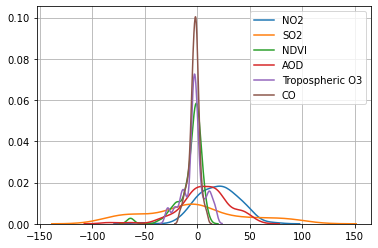

In [4]:
import seaborn as sns, numpy as np
ax = sns.kdeplot(df['NO2'], label="NO2")
ax = sns.kdeplot(df['SO2'], label="SO2")
ax = sns.kdeplot(df['MODIS_NDVI'], label="NDVI")
ax = sns.kdeplot(df['MODIS_AOD'], label="AOD")
ax = sns.kdeplot(df['Tropospheric_O3'], label="Tropospheric O3")
ax = sns.kdeplot(df['CO'], label="CO")
ax.legend()
ax.grid()

In [5]:
df_ = df[df['Population']>5]

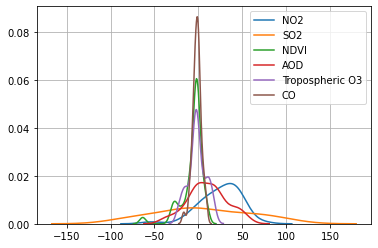

In [6]:
import seaborn as sns, numpy as np
ax = sns.kdeplot(df_['NO2'], label="NO2")
ax = sns.kdeplot(df_['SO2'], label="SO2")
ax = sns.kdeplot(df_['MODIS_NDVI'], label="NDVI")
ax = sns.kdeplot(df_['MODIS_AOD'], label="AOD")
ax = sns.kdeplot(df_['Tropospheric_O3'], label="Tropospheric O3")
ax = sns.kdeplot(df_['CO'], label="CO")
ax.legend()
ax.grid()

In [7]:
df__ = pd.DataFrame(columns=['val', 'species', 'population', 'gdp'])
for i in range(df['NO2'].shape[0]):
    df__.loc[i] = [df['NO2'].iloc[i], 'NO2', df['Population'].iloc[i], df['GDP'].iloc[i]]
for i in range(df['SO2'].shape[0],2*df['SO2'].shape[0]):
    df__.loc[i] = [df['SO2'].iloc[i-df['SO2'].shape[0]], 'SO2', df['Population'].iloc[i-df['SO2'].shape[0]], df['GDP'].iloc[i-df['SO2'].shape[0]]]
for i in range(2*df['MODIS_NDVI'].shape[0],3*df['MODIS_NDVI'].shape[0]):
    df__.loc[i] = [df['MODIS_NDVI'].iloc[i-2*df['MODIS_NDVI'].shape[0]], 'NDVI', df['Population'].iloc[i-2*df['MODIS_NDVI'].shape[0]], df['GDP'].iloc[i-2*df['MODIS_NDVI'].shape[0]]]
for i in range(3*df['MODIS_AOD'].shape[0],4*df['MODIS_AOD'].shape[0]):
    df__.loc[i] = [df['MODIS_AOD'].iloc[i-3*df['MODIS_AOD'].shape[0]], 'AOD', df['Population'].iloc[i-3*df['MODIS_AOD'].shape[0]], df['GDP'].iloc[i-3*df['MODIS_AOD'].shape[0]]]
for i in range(4*df['Tropospheric_O3'].shape[0],5*df['Tropospheric_O3'].shape[0]):
    df__.loc[i] = [df['Tropospheric_O3'].iloc[i-4*df['Tropospheric_O3'].shape[0]], 'Tropospheric_O3', df['Population'].iloc[i-4*df['Tropospheric_O3'].shape[0]], df['GDP'].iloc[i-4*df['Tropospheric_O3'].shape[0]]]
for i in range(5*df['CO'].shape[0],6*df['CO'].shape[0]):
    df__.loc[i] = [df['CO'].iloc[i-5*df['CO'].shape[0]], 'CO', df['Population'].iloc[i-5*df['CO'].shape[0]], df['GDP'].iloc[i-5*df['CO'].shape[0]]]
df__['val']=df__['val'].astype('float64')
df__['val'][df__['val']>1000] = np.nan
df__['val'][df__['val']<-1000] = np.nan

/home/manmeet/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/manmeet/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


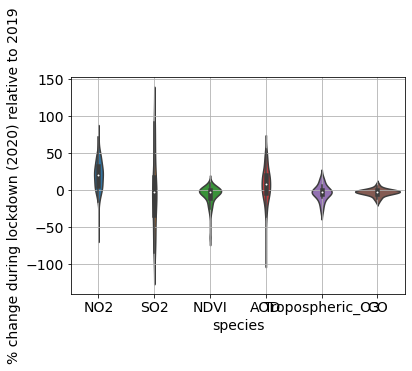

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
ax = sns.violinplot(x="species", y="val", data=df__)
ax.grid()
ax.set_ylabel("% change during lockdown (2020) relative to 2019")
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig("megacities.png",dpi=500)

In [34]:
dfp1 = df__[df__['population']>5]
#dfp1 = dfp1[dfp1['gdp']>5000]

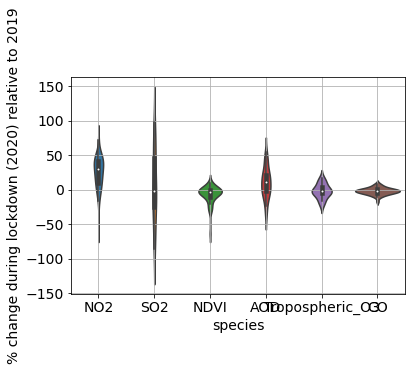

In [35]:
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
ax = sns.violinplot(x="species", y="val", data=dfp1)
ax.grid()
ax.set_ylabel("% change during lockdown (2020) relative to 2019")
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig("megacities1.png",dpi=500)

In [39]:
from scipy.stats import ttest_1samp
import numpy as np
cols = ["NO2", "SO2", "NDVI", "AOD", "Tropospheric_O3", "CO"]
for i in range(len(cols)):
    dist = df__[df__["species"]==cols[i]]
    dist = dist.dropna()
    #print(dist["val"])
    tset, pval = ttest_1samp(dist["val"], 0)
    print(cols[i], pval, dist["val"].mean())

NO2 6.440925934113365e-15 19.74590909090909
SO2 0.4640816961409867 -4.55508474576271
NDVI 8.760528929614382e-06 -6.471264367816091
AOD 0.00434640404836937 7.385568181818183
Tropospheric_O3 0.1584362535951085 -3.238436329268182
CO 2.574605704881235e-07 -2.87125


In [40]:
from scipy.stats import ttest_1samp
import numpy as np
cols = ["NO2", "SO2", "NDVI", "AOD", "Tropospheric_O3", "CO"]
for i in range(len(cols)):
    dist = dfp1[dfp1["species"]==cols[i]]
    dist = dist.dropna()
    #print(dist["val"])
    tset, pval = ttest_1samp(dist["val"], 0)
    print(cols[i],  pval, dist["val"].mean())

NO2 9.766931937017044e-09 25.005581395348838
SO2 0.5991089689384099 4.757352941176471
NDVI 0.0013851511920034872 -6.740465116279069
AOD 0.004220008056506044 10.181860465116278
Tropospheric_O3 0.5584406891094478 -1.6078189179933338
CO 0.02693073194951688 -1.7404651162790699
